Normal distribution percentages:
    68.27% - 1 standard deviation from the mean
    95.45% - 2 stds
    99.73% - 3 stds

mean = expected value = average

mean = sum(relative frequency * value)

relative frequency = number of units / total number of units


# Discrete Random Variables

Problem 1:
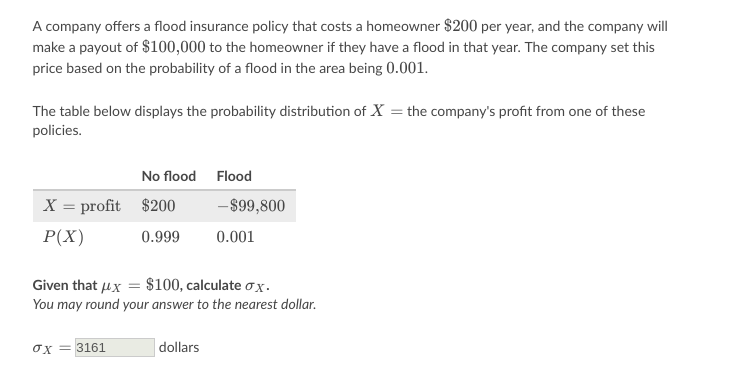

In [1]:
# solution 1:
# calculate std knowing the mean, values and their probabilities 

import math

MU = 100
values = [200, -99800]
probabilities = [0.999, 0.001]

# first we need to find variance
# to do so we calculate:
# 1. how far each actual value from the mean is
# 2. raise it to the second power
# 3. multiply by its probability

variance = 0
for value, probability in zip(values, probabilities):
    variance += (value - MU)**2 * probability
    
sigma = math.sqrt(variance)

print("Variance is %.2f " % variance)
print("Standard deviation is %.2f"% sigma)

Variance is 9990000.00 
Standard deviation is 3160.70


In [2]:
# inspired by theoretical versus experimental probability:
# https://www.khanacademy.org/math/statistics-probability/probability-library/randomness-probability-and-simulation/v/experimental-versus-theoretical-probability-simulation

import random

THROWS_NUMBER = 3
THRESHOLD = 10
TRIALS_NUMBER = 100

def is_winner_trial_game(throws_number, threshold):
    result = sum(random.randint(1,6) for x in range(throws_number))
    return result >= threshold

def generate_games(trials, throws_number, threshold):
    
    games_won = 0
    
    for _ in range(trials): 
        if is_winner_trial_game(throws_number, threshold):
            games_won += 1
            
    print(games_won/trials)

generate_games(TRIALS_NUMBER, THROWS_NUMBER, THRESHOLD)



0.65


In [3]:
# from Peter Norvig on probabilities:
# https://nbviewer.jupyter.org/url/norvig.com/ipython/Probability.ipynb

import fractions

def P(event, space):
    "The probability of an event, given the sample space of outcomes"
    return fractions.Fraction(len(event & space), len(space))

# for intersect (&) to work we need to use set, not list
space = {1,2,3,4,5,6}
event = {2,4,6}

P(event, space)

Fraction(1, 2)

In [4]:
# n choose k
import math

def calculate_combinations(n, k):
    # another way is to take the number of permutations and divide it by factorial of k
    return math.factorial(n) // (math.factorial(n-k) * math.factorial(k))

calculate_combinations(3,0)

1

# Binomial distribution

In [5]:
# binomial probability example

import scipy.stats as ss

total_trials = 4
success_rate = 0.4

# example 1: exact value, binompdf

target_successes_number = 3

probability = ss.binom.pmf(target_successes_number, total_trials, success_rate)
print(probability)

# example 2: range, binomcdf

target_less_or_equal_number = 1

probability = ss.binom.cdf(target_less_or_equal_number, total_trials, success_rate)
print(probability)

0.15360000000000007
0.47519999999999996


In [6]:
# mean and std of a binomial random variable

import math

sample = 20
success_rate = 0.2

mean = sample * success_rate
print(mean)

variance = sample * success_rate * (1-success_rate)
std = math.sqrt(variance)
print(std)

4.0
1.7888543819998317


# Geometric distribution

In [7]:
# geometric random variable

import scipy.stats as ss

success_rate = 0.12
target_number = 4

probability = ss.geom.pmf(target_number, success_rate)
print(probability)

target_less_or_equal_number = 4
cumulitive_probability = ss.geom.cdf(target_less_or_equal_number, success_rate)
print(cumulitive_probability)
print(1-cumulitive_probability)


0.08177664
0.40030464
0.59969536
